In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('数据整合.csv')
data.head()

,Formula,Band gap,MP-ID,density,vpa,packing fraction,Central symmetry
0,Ba3Ca2(SiN3)2,1.875,mp-1019520,4.570851,17.671158,0.834911,0
1,IrI3,1.398,mp-1025442,6.805422,34.949094,0.320381,0
2,ThTe3,1.088,mp-1025522,6.862531,37.193373,0.395979,0
3,Y4Se3N2,1.445,mp-1029349,4.989108,22.947597,0.576815,0
4,RbSbO2,2.277,mp-10418,4.731690,20.988543,0.821177,0


In [2]:
data['Central symmetry'].value_counts()

1    310
0    297
Name: Central symmetry, dtype: int64

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [4]:
y = data['Central symmetry'].values
excluded = ['Formula', 'MP-ID', 'Central symmetry']
X = data.drop(excluded, axis = 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size = 0.3,
                                                    random_state = 78)

In [6]:
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(X_train, y_train)
modelKNN.score(X_test, y_test)

0.8032786885245902

In [7]:
param_grid = {'n_neighbors': np.arange(1, 11, 1),
              'weights' : ('uniform', 'distance'),
              'leaf_size': (20, 30, 40, 50)
              }
kfold = StratifiedKFold(n_splits = 10, shuffle=True,
                        random_state = 20)
model_KNN = GridSearchCV(KNeighborsClassifier(),
                     param_grid, cv = kfold)

In [8]:
model_KNN.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=20, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': (20, 30, 40, 50),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'weights': ('uniform', 'distance')})

In [9]:
model_KNN.score(X_test, y_test)

0.7814207650273224

In [10]:
model_KNN.best_params_

{'leaf_size': 20, 'n_neighbors': 6, 'weights': 'uniform'}

In [11]:
model_KNN.best_score_

0.8060908084163897

In [12]:
model_KNN.best_estimator_

KNeighborsClassifier(leaf_size=20, n_neighbors=6)

In [13]:
model_knn = KNeighborsClassifier(leaf_size=20, n_neighbors=8, weights='distance')
model_knn.fit(X_train, y_train)
model_knn.score(X_test, y_test)

0.7868852459016393

In [14]:
y_pred = model_knn.predict(X_test)
y_pred.shape

(183,)

[[77 13]
 [26 67]]


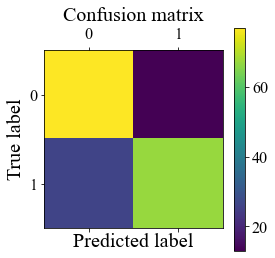

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman']
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix',fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.ylabel('True label', fontsize = 20)
plt.xlabel('Predicted label',fontsize = 20)
plt.savefig('c2.png', dpi = 300)
#plt.show()

In [16]:
#from sklearn.inspection import plot_partial_dependence
table = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
table

Predicted,0,1
Actual,,
0,77,13
1,26,67


In [17]:
table = np.array(table)
Accuracy = (table[0, 0] + table[1,1]) /np.sum(table)
print(Accuracy)

Error_rate = 1 - Accuracy
print(Error_rate)

0.7868852459016393
0.21311475409836067


In [18]:
Precision = table[1, 1]/(table[1, 1]+table[0, 1])
print('Precision:', Precision)

Sensitivity = table[1, 1]/(table[1, 0] + table[1,1])
print(Sensitivity)

Specificity = table[0, 0] /(table[0,0] + table[0, 1])
print(Specificity)

Recall = table[1, 1] /(table[0, 1] + table[1,1])
print(Recall)

print(f1_score(y_test, y_pred))
cohen_kappa_score(y_test, y_pred)

Precision: 0.8375
0.7204301075268817
0.8555555555555555
0.8375
0.7745664739884393


0.5746468800286072

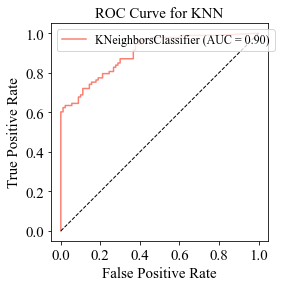

In [19]:
from sklearn.metrics import RocCurveDisplay
plt.rcParams['font.sans-serif']=['Times New Roman']

RocCurveDisplay.from_estimator(model_knn, X_test, y_test, color = 'salmon')
x = np.linspace(0, 1, 100)
plt.plot(x, x, 'k--', linewidth = 1)
plt.title('ROC Curve for KNN', fontsize = 15)
plt.axis('square')
plt.xlim()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate',fontsize = 15)
fontdict = {'family': 'Times New Roman',
            'size': 12}
            #'style': 'italic'}
plt.legend(prop=fontdict, loc = 'upper left')
plt.savefig('r2.png', dpi = 300)
#plt.show()